# Solutions Q 16 - 21 

In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.integrate import quad
init_printing()                      # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 14})  # set font size for plots

## Q16 answer
Using the ideas presented in the 'strategy' expanding the integral forms,

$$\displaystyle G^1(u)=2+\frac{2\int E(t)E(u+t)dt}{\int E(t)^2dt}$$

where the limits are $\pm \infty$. As a check that $\int E(t)dt=\int E(u+t)dt$. SymPy can be used to perform the integrals. It is easier to help by converting the cosines to exponentials first:

In [2]:
omega, a, t, u = symbols('omega, a, t, u',positive=True)

f01 = cos(omega*t/a)*exp(-(t/a)**2/2)         # define electric fields
f02 = cos(omega*(t+u)/a)*exp(-((t+u)/a)**2/2)
ef01   = expand(f01.rewrite(exp))
intf01 = integrate(ef01,(t,-oo,oo),conds='none')
simplify(intf01)

In [3]:
# and for the t+u function
ef02   = expand(f02.rewrite(exp))
intf02 = integrate(ef02,(t,-oo,oo),conds='none')
simplify(intf02)

which shows that $\int E(t)dt=\int E(u+t)dt$. The same is true for the powers of the integrals. The cross term is $2\int E(t)E(u+t)dt$ and is calculated as

In [4]:
# calculate the cross term E(t)E(t+u)
fcross = simplify(2*expand(ef01*ef02))
intfcross= integrate(fcross, (t,-oo,oo),conds='none')
simplify(intfcross)

This can be simplified by converting the $e^{-i\omega u/a }$ terms to  a cosine and the result is

$$\displaystyle  \int E(t)E(u+t)dt = \frac{\sqrt{\pi}}{a}e^{-u^2/(4a^2)}\left(\cos\left(\frac{\omega u}{a}\right) +e^{-\omega^2} \right)$$

The normalisation is found when $u=0$ and is $\displaystyle \int E(t)^2dt = \frac{\sqrt{\pi}}{a}(e^{-\omega^2}+1)$ and this produces the fringe resolved autocorrelation shown in figure 35. The final equation, divided by two so that the signal is 1 in the wings, is 

$$\displaystyle  1+ \frac{\int E(t)E(u+t)dt}{\int E(t)^2dt}  = 1 + \frac{e^{-u^2/(4a^2)}\left(\cos\left(\frac{\omega u}{a}\right) +e^{-\omega^2} \right)}{1+e^{-\omega^2}} $$

This function is calculated and plotted as $G^1(u)$ below,

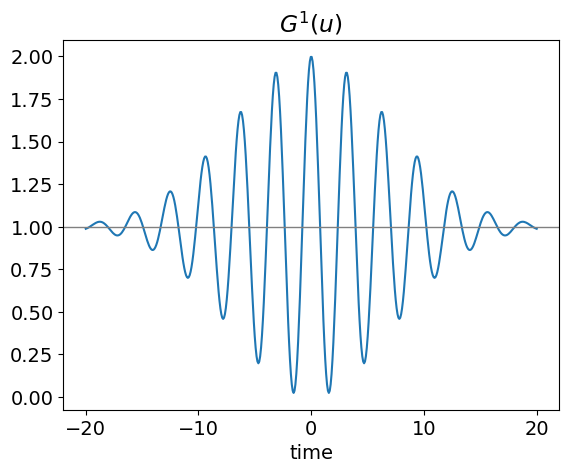

In [5]:
G1 = lambda u, a, omega: 1+(np.exp(-u**2/(4*a**2)) *(np.cos(omega*u/a)+np.exp(-omega**2)) )/(1+np.exp(-omega**2))
a = 5
omega = 10
u = np.linspace(-20,20,500)

plt.plot(u,G1(u,a,omega))
plt.axhline(1,linewidth=1,color='grey')
plt.title(r'$G^1(u)$')
plt.xlabel('time')
plt.show()

Fig. 56. The First order correlation.
______

**(b)** The second-order correlation is calculated in a similar way; expanding the terms before integrating gives

$$\displaystyle G^2(u)=2+4\frac{\int E(t)E(u+t)^3 + E(t)^3E(u+t)dt}{\int E(t)^4dt}+6\frac{\int E(t)^2E(u+t)^2 dt}{\int E(t)^4dt}$$

Immediately it can be seen that at long positive and negative delays, the correlation is going to be constant. This is because when the pulses are not overlapped, each pulse produces frequency doubled light which the detector measures. 

The denominator integrates to a simple expression, but not the numerator, and therefore python/SymPy is used to calculate and plot $G^2$ directly. 

The normalization term has a value of 1/8, but it is conventional to have the signal with a value of 1 in the wings of the pulse, because here frequency doubling from only one arm of the interferometer is measured, and the autocorrelation is multiplied by 8 to achieve this.

The algebraic solution of each integral is given below calculated using SymPy. Unless you are interested in how to do this calculation skip this part and go straight to the figure.

In [6]:
# to calculate G^2(u)
omega, a, t, u = symbols('omega, a, t, u',positive=True)

f01= cos(omega*t/a)*exp(-(t/a)**2/2)          # define electric fields
f02= cos(omega*(t+u)/a)*exp(-((t+u)/a)**2/2)
ef01   = expand(f01.rewrite(exp))             # change into exponential form to ease integration
ef02   = expand(f02.rewrite(exp))

# normalisation # int E(t)^4
ef01_4 = expand(ef01**4)
norml4 = integrate(ef01_4,(t,-oo,oo),conds='none')
factor(norml4)

In [7]:
# integration E(t) x E(t+u)^3 and vice versa
ef13 = expand(ef01*ef02**3)
term13 = integrate(ef13,(t,-oo,oo),conds='none')
factor(term13)

In [8]:
# integration E(t)^2 x E(t+u)^2
ef02 = expand(f02.rewrite(exp))
ef22 = expand(ef01**2*ef02**2)
term22 = integrate(ef22,(t,-oo,oo),conds='none')
factor(term22)

The integrals can be used as they are or converted back into cosine form using $\displaystyle 2\cos(x)=e^{ix}+e^{-ix}$; thus

$$\begin{align}
\int E(t)^4dt &= \frac{a\sqrt{2\pi}}{16}\left(3+e^{-2\omega^2}+4e^{-\omega^2/2}\right) \\
\int E(t)E(u+t)^3dt &= \frac{a\sqrt{2\pi}}{32}\left[6\cos\left(\frac{\omega u}{a}\right)
+ e^{-2\omega^2} + 2e^{-\omega^2/2}\left(\cos\left(\frac{3\omega u}{2a}\right) +6\cos\left(\frac{\omega u}{2a}\right)\right) \right]e^{-3u^2/(8a^2)} \\
\int E(t)^2E(u+t)^2dt &= \frac{a\sqrt{2\pi}}{32}\left[4+2\cos\left(\frac{2\omega u}{a}\right) +2e^{-2\omega^2} +8\cos\left(\frac{\omega u}{a}\right)e^{-\omega^2/2} \right]e^{-u^2/(2a^2} 
\end{align}$$

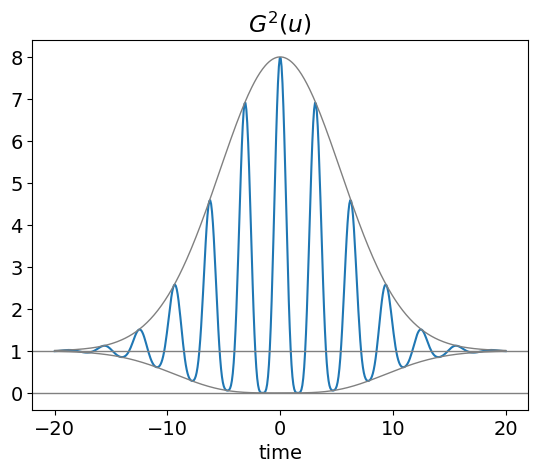

In [9]:
a = 5
omega = 10
anorm = lambda a, omega: np.sqrt(2*np.pi)*a/16*\
                   ( 3 + np.exp(-2*omega**2) + 4*np.exp(-0.5*omega**2) )

f13   = lambda u,a,omega: np.sqrt(2*np.pi)*a/32*(3*2*np.cos(omega*u/a) + np.exp(-2*omega**2)\
                      + 2*np.exp(-omega**2/2)*( np.cos(3*omega*u/(2*a))\
                    + 3*2*np.cos(omega*u/(2*a) )))*np.exp(-3*u**2/(8*a**2))

f22   = lambda u,a,omega :np.sqrt(2*np.pi)*a/32*\
                    (4+ 2*np.cos(2*omega*u/a)+2*np.exp(-2*omega**2) \
                     +4*2*np.cos(omega*u/a)*np.exp(-omega**2/2) ) *np.exp(-u**2/(2*a**2))

n = anorm(a,omega)
G2 = lambda u, a, omega: 2   + 6*f22(u,a,omega)/n + 2*4*f13(u,a,omega)/n

fmax = lambda u,a: (1+3*np.exp(-u**2/(2*a**2))+4*np.exp(-3*u**2/(8*a**2))) # max and min values
fmin = lambda u,a: (1+3*np.exp(-u**2/(2*a**2))-4*np.exp(-3*u**2/(8*a**2)))

u = np.linspace(-20,20,500)     # define time values 

plt.title(r'$G^2(u)$')
plt.plot( u, G2(u,a,omega)/2  )
plt.plot(u,fmax(u,a),color='grey',linewidth=1)
plt.plot(u,fmin(u,a),color='grey',linewidth=1)
plt.axhline(1,linewidth=1,color='grey')
plt.axhline(0,linewidth=1,color='grey')
plt.xlabel('time')
plt.show()

Figure 57. Normalized fringe resolved autocorrelation $G^2(u)$ with the upper and lower bounds shown as solid lines. The frequency of the pulse is constant throughout its duration so this is a _transform-limited_ pulse with zero chirp. The constants are $a$ = 5 and $\omega$ = 10.
__________

**(c**) The outline pulse shape is found by ignoring the cosine term and integrating. The results is shown below. The lower profile is found by subtracting the two exponentials, and has the effect only of changing the +4 term to -4.

In [10]:
# outline pulse , ****   ignore cosine ****
t, a, u = symbols('t, a, u',positive=True)
f011= ( exp(-(t/a)**2/2)  + exp(-((t+u)/a)**2/2) )**4     # define electric fields
s = integrate(f011,(t,-oo,oo),conds='none')
expand(s)

This equation can be normalised to one at long times and then simplified to give $\displaystyle \sqrt{2\pi}a(1+3e^{-u^2/(2a^2)}\pm 4e^{-3u^2/(8a^2)})$ where the positive sign corresponds to the upper curve. The fwhm of the curve $2\tau$, taking 1 as the baseline, is found by solving $\displaystyle (3e^{-\tau^2/(2a^2)}+ 4e^{-3\tau^2/(8a^2)})=7/2$. This equation is simplified by substituting $\displaystyle x=e^{-\tau^2/2a^2}$ giving $(3x+ 4x^3/4)=7/2$ which has one real solution which is 0.4428, and therefore $\displaystyle \tau = a\sqrt{-2\ln(0.4428)}=1.276a$. The original pulse has a fwhm of $\displaystyle a\sqrt{2\ln(2)}$, therefore the outline of the autocorrelation is $\approx$ 1.08 times wider than the pulse.

**(c)** The Fourier transform of the pulse is

$$\displaystyle g(k)= \frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^\infty \cos\left(\frac{\omega t}{a}\right)e^{-(t/a)^2/2}e^{-ikt}dt$$

and this is of a standard type of integral if the cosine is converted to its exponential form. Then $\displaystyle g(k)= \frac{1}{2\sqrt{2\pi}}\int\limits_{-\infty}^\infty (e^{i\omega t}+e^{-i\omega t})e^{-(t/a)^2/2-ikt}dt $.

The transform is thus $\displaystyle g(k)=\frac{a}{2}(e^{2ak\omega} +1)e^{-(ak+\omega)^2/2}$ and is shown in the next figure. The shape is dominated by the Gaussian shape of the final exponential.

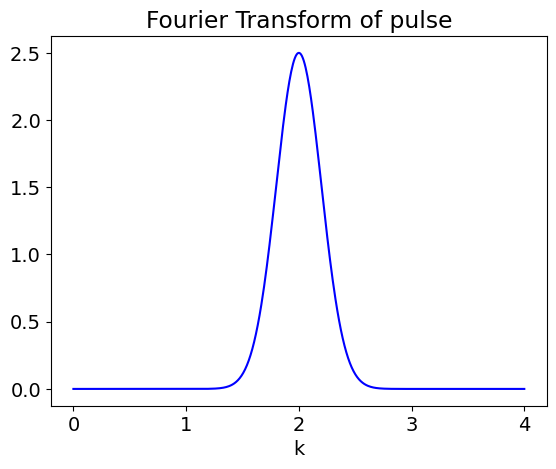

In [11]:
gk = lambda k,a, omega : 0.5*a*(np.exp(2.0*a*k*omega) +1 )*np.exp(-(a*k + omega )**2/2.0)
a = 5
omega = 10
k = np.linspace(0,4,500)
plt.plot(k,gk(k,a,omega),color='blue')
plt.xlabel('k')
plt.title('Fourier Transform of pulse')
plt.plot()
plt.show()

## Q17 answer
**(a)** The integration for the $\displaystyle e^{-|x|/a}$ pulse is $\displaystyle \int_{-\infty}^\infty e^{-|x|/a}e^{-|x+u|/a}dx$ which is simplified, as the autocorrelation is symmetric about zero, by doubling the integral from 0 to $\infty$, in which case the absolute values are not needed. The result is $\displaystyle 2\int_0^\infty e^{-2x/a}e^{-u/a}dx = ae^{-u/a}$. However, when plotting the absolute values must be replaced as $u$ can be negative. Thus $\displaystyle A(u) = ae^{-|u|/a}$.

At the fwhm let $u=\tau$ and $\displaystyle A(u)=1/2= ae^{-\tau/a}$ thus $\tau=2a\ln(2a)$. The laser pulse fwhm is $2a\ln(2)$ the autocorrelation is thus $\ln(2a)/\ln(2)$ wider.

**(b)** The $\mathrm{sech}^2$ pulse can be simplified first by converting to its exponential form then integrated, and after inserting limits of $\pm\infty$, the normalised result is 

$$\displaystyle A(u) =16\frac{e^{2u} [ u(e^{2u}+1) - (e^{2u}-1) ]}{(e^{2u}-1)^3}$$

The fwhm can be found by solving the autocorrelation for the value $u$ when $A(u)$=0.5. This is easily done to sufficient accuracy using the Newton - Raphson method outlined below and in chapter 3.1. The method is recursive, if x is the required solution then $x=x-f(x)/f'(x)$ is repeatedly calculated where $f(x)$ is the function and $f'(x)$ the first derivative wrt. $x$. To find the half width $A(u)$-1/2 is the function to find the root.

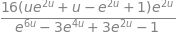

In [12]:
x = symbols('x')
u = symbols('u', positive=True)  # this is necessary to get solution
eqn= (2/(exp(x)+exp(-x) ) )**2*(2/(exp(x+u)+exp(-x-u) ) )**2
Au = simplify(integrate(eqn,(x,-oo,oo )  )  )
Au

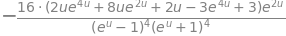

In [13]:
df = simplify(diff(Au,u) )
factor(df)

In [14]:
# Newton-Raphson
# derivative of A(u) is df    # simplified function and derivative used 

df = lambda u: -16*np.exp(2*u)*(2*u*np.exp(4*u)+8*u*np.exp(2*u)+2*u-3*np.exp(4*u) +3)\
                 /(np.exp(2*u) -1 )**4

# function A(u)-1/2  and find value when zero (root).

f = lambda u:16*np.exp(2*u)*(u*np.exp(2*u)+u-np.exp(2*u)+1)/(np.exp(2*u)-1)**3 - 1/2

x = -0.5                 # initial guess
for i in range(6):       # 6 iterations are enough
    x = x - f(x)/df(x)
    print(x)

-1.992610035168469
-1.5791589526105754
-1.6377830584176059
-1.6389083234043145
-1.6389087505542517
-1.6389087505543132


which shows that the half width at half maximum (fwhm)  is 2$\cdot$ 1.64. In comparison the same value to the $\mathrm{sech}^2$ pulse is 2$\cdot$ 0.88 thus the autocorrelation is $\approx$ 1.86 times wider. 

## Q18 answer
The acoustic pulse, $S(t)$ with $a$ = 0 compared with $a$ = 60,shows that the frequency is higher at short times than at longer ones; a down chirp. see fig 58. The calculated autocorrelation of the chirped and un - chirped pulse, are shown in Fig. 59. The calculation is essentially the same as in section 5. 

![Drawing](fourier-fig58.png)

Figure 58. Left. An acoustic pulse $S(t)$ but without a chirp, $a$ = 0. A chirped  pulse (right) mimicking that emitted by a bat when close to its prey. 

_____

The un-chirped pulse $a$ = 0 produces a linearly decreasing autocorrelation but which is so long that poor range discrimination would be achieved and the bat would hardly ever succeed in catching its prey. The integral of this autocorrelation also increases slowly with time and hence distance, again indicating that the bat would find it difficult to discriminate the prey from something else. The chirped pulse has a small autocorrelation amplitude at long times, therefore, its summation is large and constant when the bat is far from the prey, but it decreases rapidly as it approaches within 3 cm of its target allowing sharp range discrimination. Figure 59 shows the summed autocorrelations together with the experimental data given in the question.

![Drawing](fourier-fig59.png)

Figure 59. Left: Autocorrelations of bat pulses $S(t)$ with no chirp (grey dotted line) and with down chirp (solid green line). Right: The sum of the autocorrelation with time, converted into distance, for the same two pulses together with the experimental data which is the percentage correct response vs difference in distance to the target. (Data was measured from Simmons 1971, Fig. 2.)

____

The summation in figure 59 was calculated as follows where $A_0$ is the autocorrelation.

$\text{S0 = [ 0.0  for  i  in  range( numt) ] }$

$\text{for  i  in  range( numt ): S0[i] = sum( [ abs( A0[ k ] ) for k in range( i ) ] )}$

## Q19 answer
The method to use similar to that used in the example. However, when the raw data is plotted the signal is buried in the noise, Fourier transforming produces an ambiguous result where it is not clear where to set the filter to extract the data. Apodising, by multiplying the data by an exponential decreases the noise in the longer part of the data and helps to identify the frequencies present. The initial FID and its Fourier transform is shown in the figure.

![Drawing](fourier-fig60a.png)

fig 60 Left: ideal FID of two spins. Right: close-up of the spectrum (imag part of transform) showing two lines, one at each frequency.

_____

The code with which to calculate the FID and FFT is shown below

In [15]:
#.. make FID add noise and make FFT

n = 2**12
maxx = n/2
x =  np.linspace(0,maxx,n)    # make n points and of length maxx
tp = maxx/n
freq = [ i/(tp*n) for i in range(n)]
nu1 = 1/4.8
nu2 = 1/4.5
sig = 2.0  # magnitude of noise use randn() to use normally distributed noise

fid0 = [ np.exp(-x[i]/300.0)*(np.sin(2*np.pi*nu1*x[i]) + np.sin(2*np.pi*nu2*x[i]) ) \
         + sig*np.random.randn() for i in range(n)]

fft0 = np.fft.rfft(fid0).imag    # as FID contais sine waves FFT is imaginary.
#.. plots shwon in the next figures

![Drawing](fourier-fig60.png)

Figure 61. Noise added to the FID and then transformed to give a noisy spectrum of which only the imag part is shown. It is clear from the FFT that it is hard to determine which peaks are due to the data and which due to noise.
_____

The figure shows that data is clearly swamped by noise. The next step is to apodise by multiplying by an exponential. This decreases the noise relative to the signal as this is largest at earlier times. The decay time can be chosen by trial and error  to best illustrate the features wanted.

#.. define a new list to hold the apodised FID

$\text{fid1 = [0 for i in range( n )]  }\qquad $ # make new list to hold new FID
$\text{for i in range(n):}$

$\qquad \text{    fid1[ i ] = fid0[i]*np.exp(-i/1000)}$

$\text{fft1 = np.fft.rfft( fid1 ).imag  }\qquad $ # calculate FFT 

#.... plot data as above 

![Drawing](fourier-fig62.png)

Figure 62. The apodised FID (left) is transformed into the spectrum thereby retrieving the two frequencies. The original frequencies, although not perfectly isolated,  are at approx 0.2 and can clearly be identified from the noise.

____

## Q20 answer
Plotting the data with and without noise, shows that the pulse lasts for about 2 ps, and examining this close to the maximum time, indicates that the smallest period is about 60 fs. Therefore, $n$ = 2<sup>12</sup> points will be more than adequate for the Fourier transforms.

The pulse has the form $\displaystyle \sin(x^2/200^2 )\exp(- (x-800.0)^2/200.0^2)$ and the noise, with an amplitude from $\pm$1, is added by including randn(). The plot shows the chirped pulse (pure pulse), and with the noise added, this forms the 'experimental' data. The pure pulse and the recovered data are shown in the second set of figures below. 

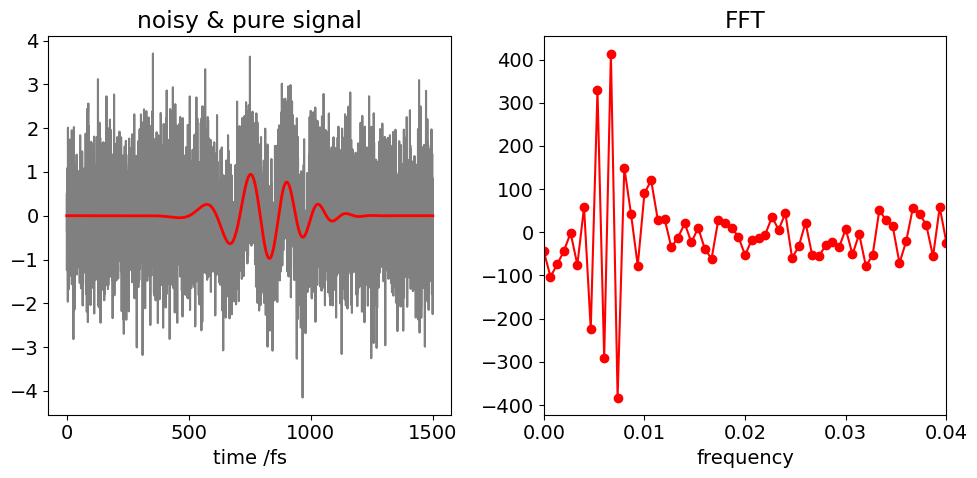

In [16]:
n = 2**12
maxt = 1500
t  = np.linspace(0,maxt,n)
tp = maxt/n
# make data with and without noise
pnoise = [ np.sin((t[i]/200)**2 )*np.exp(-((t[i]-800.0)/200.0)**2)+np.random.randn() for i in range(n) ]
pulse =  [ np.sin((t[i]/200)**2 )*np.exp(-((t[i]-800.0)/200.0)**2) for i in range(n) ]

freq= [ i/(tp*n) for i in range(n)]
fig1= plt.figure(figsize=(10.0,5.0))
ax0 = fig1.add_subplot(1,2,1)
ax1 = fig1.add_subplot(1,2,2)

ax0.plot(t,pnoise,color='gray')
ax0.plot(t,pulse,color='red',linewidth=2)
ax0.set_xlabel('time /fs')
ax0.set_title('noisy & pure signal')

fft0= np.fft.rfft(pnoise).real

ax1.plot(freq[0:n//2],fft0[0:n//2],marker='o',color='red')
ax1.set_xlim([0,0.04])
ax1.set_title('FFT')
ax1.set_xlabel('frequency')
plt.tight_layout()
plt.show()

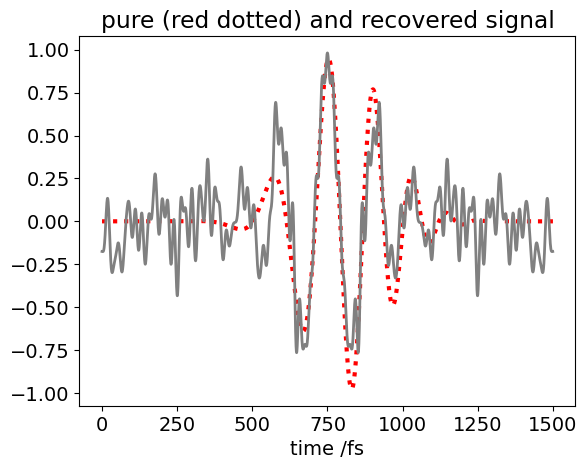

In [17]:
# from FFT plot choose frequencies to include in reverse transform
filter = [ fft0[i]  if (i/n >0.0 and i/n <0.02)   else 0 for i in range(n//2)]

fft1 = np.fft.irfft(filter)

plt.plot(t,pulse,color='red',linewidth=3,linestyle='dotted')
plt.plot(t[0:n-2],fft1[0:n],color='gray',linewidth=2)
plt.xlabel('time /fs')
plt.title('pure (red dotted) and recovered signal')
plt.show()

## Q21 answer
The recursive algorithm below is based on the equation in the text. The data is assumed to have been calculated elsewhere and put into array called data, the smoothed data is called sdata.

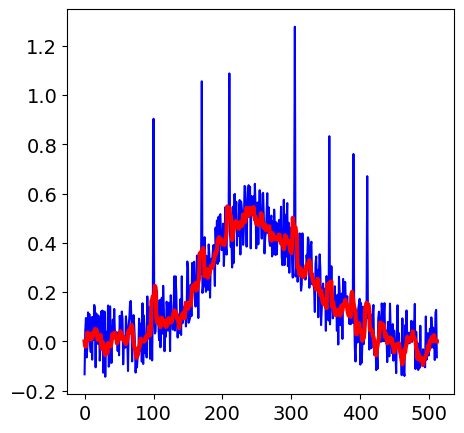

In [18]:
#  make some noisy data. The window has width m=3. This code generates the data shown in the text.
fig1= plt.figure(figsize=(5.0,5.0))
n = 2**9
noise = [ 0 for i in range(n)]

for i in [100,170,210,305,355,390,410]:
    noise[i] = np.random.rand() + 0.5

data = [ noise[i]*0.75 + np.exp(-(i-250)**2/1e4)*0.5 + 0.3*np.random.rand()-0.3/2 for i in range(n)]

x    = [i   for i in range(n)]
sdata= [0.0 for i in range(n)]
m = 3
sdata[m]= sum(data[i] for i in range(0,2*m+1))/(2*m+1)
for i in range(1,n-m):
    sdata[i] = sdata[i-1] + (data[i+m]-data[i-m-1])/(2*m+1)
plt.plot(x,data,color='blue')
plt.plot(x,sdata,color='red',linewidth=3)
plt.show()